# Offensive players and team performance in the 2017/18 NFL season

In [1]:
import pandas as pd 
pd.options.display.max_rows = 20 

passing_RS = pd.read_csv('regular_season/passing_RS.csv', index_col = 'name')
rushing_RS = pd.read_csv('regular_season/rushing_RS.csv', index_col = 'name')
receiving_RS = pd.read_csv('regular_season/receiving_RS.csv', index_col = 'name')

standings = pd.read_csv('regular_season/standings_RS.csv', index_col = 'Team')


## Part one:
## The link between a team's season standing and the rank of their quarterback 


The following table ranks the players who play the position 'Quarterback' by the amount of passing yards they have gained. The ones at the top of the table have more than 10x the amount of yards, the ones at the bottom do. 
What percentage of the total amount of yards do they generate ? 

In [2]:
passing_RS[(passing_RS.Yards < 1000) | (passing_RS.Yards > 3000)]

,rank,team,position,Completions,Attempts,Yards,Touchdowns,Interseptions,Long,20+,40+,Times Sacked,Rating
name,,,,,,,,,,,,,
Tom Brady,1,NE,QB,385,581,4577,32,8,64,62,10,35,102.8
Philip Rivers,2,LAC,QB,360,575,4515,28,10,75,61,12,18,96.0
Matthew Stafford,3,DET,QB,371,565,4446,29,10,71,61,16,47,99.3
Drew Brees,4,NO,QB,386,536,4334,23,8,54,72,11,20,103.9
Ben Roethlisberger,5,PIT,QB,360,561,4251,28,14,97,52,14,21,93.4
Matt Ryan,6,ATL,QB,342,529,4095,20,12,88,54,8,24,91.4
Kirk Cousins,7,WAS,QB,347,540,4093,27,13,74,59,9,41,93.9
Alex Smith,8,KC,QB,341,505,4042,26,5,79,52,13,35,104.7
Russell Wilson,9,SEA,QB,339,553,3983,34,11,74,58,12,43,95.4


In [3]:
total_p_yards = passing_RS['Yards'].sum()
print ('Total pass yards in the table: ' + str(total_p_yards))

Total pass yards in the table: 119385


In [4]:
top10_QB = passing_RS.head(10)
bottom10_QB = passing_RS.tail(10)
bottom25_QB = passing_RS.tail(25)

In [5]:
top10_total = top10_QB['Yards'].sum()
top10_per = round((top10_total / total_p_yards) * 100 )
print ('The percentage of yards gained by the top 10 Quarterbacks: ' 
       + str(top10_per))

The percentage of yards gained by the top 10 Quarterbacks: 35.0


In [6]:
bottom10_total = bottom10_QB['Yards'].sum()
bottom10_per = round((bottom10_total / total_p_yards) * 100)
print ('The percentage of yards gained by the bottom 10 Quarterbacks: '
      + str(bottom10_per))

The percentage of yards gained by the bottom 10 Quarterbacks: 4.0


In [7]:
bottom25_total = bottom25_QB['Yards'].sum()
bottom25_per = round((bottom25_total / total_p_yards) * 100 )
print ('The percentage of yards gained by the bottom 25 Quarterbacks: '
      + str(bottom25_per))

The percentage of yards gained by the bottom 25 Quarterbacks: 24.0


We see that the top 10 ranked quarterbacks are significantly more productive than the lower half of the table.
If we were to plot this we would expect a declination in productivity as rank decreases.

In [8]:
%matplotlib inline

### Passing yards decline as the rank of the player gets lower:

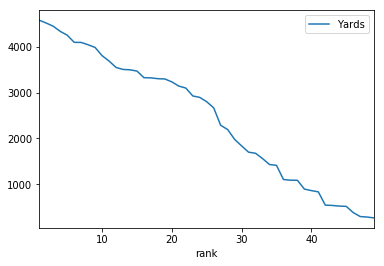

In [9]:
passing_RS.plot(x = 'rank' ,y = 'Yards')

### The same holds for touchdowns:
(Although the graph does not decline steadily as the previous one. This is because most often, players are ranked based on the stat which is most specific to their position. Such is the case here, with quarterbacks being ranked by the amount of passing yards they have gained; wide-receivers by receptions; halfbacks by average rushing yards per attempt) 

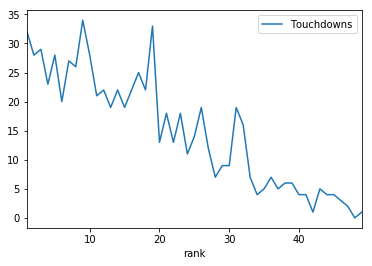

In [10]:
passing_RS.plot(x = 'rank', y = 'Touchdowns')

### Higher ranked Quarterbacks also turn the ball over much less:

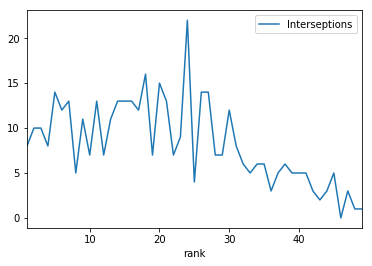

In [11]:
passing_RS.plot(x = 'rank', y = 'Interseptions')

This graph spikes in the middle, which is not a result we have gotten so far. Interseptions in the 'passing' table is a negative stat, the amount of times a quarterback has thrown the ball to the other team. What is the reason for the spike in the middle of the table ? 
There are 32 teams in the league. At any one time in an offensive formation there can only be one quarterback. Most of the teams have their starting QB in the field for the majority of the game, with the substitutes entering only in the end of sure-win games or in the case of an injured starter. 

We can hypothesize that the reason for the result in the previous graph is because the QBs in the middle of the table are the worst of the starting QBs in the league. 

### The QB Rating: 

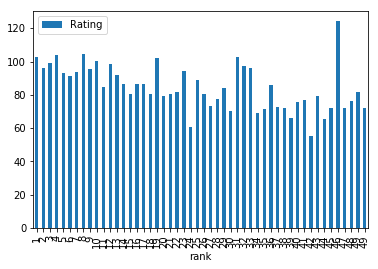

In [12]:
passing_RS.plot.bar(x = 'rank', y = 'Rating')

In addition to their 'rank', quarterbacks also have a 'QB rating'. This stat is influenced by the QB's pass conversion percentage and the amount of touchdowns and interseptions they have to their name.
The players with the lowest ratings are in the middle, towards the end, which is in accordance with the hypothesis that they are the worst of the starters, and also substitutes (at the end). 

In [13]:
team_dict = {'ARI' : 'Arizona Cardinals',
            'ATL' : 'Atlanta Falcons',
            'BAL' : 'Baltimore Ravens', 
            'BUF' : 'Buffalo Bills',
            'CAR' : 'Carolina Panthers',
            'CHI' : 'Chicago Bears',
            'CIN' : 'Cincinnati Bengals',
            'CLE' : 'Cleveland Browns', 
            'DAL' : 'Dallas Cowboys',
            'DEN' : 'Denver Broncos',
            'DET' : 'Detroit Lions', 
            'GB' : 'Green Bay Packers', 
            'HOU' : 'Houston Texans',
            'IND' : 'Indianapolis Colts', 
            'JAX' : 'Jacksonville Jaguars',
            'KC' : 'Kansas City Chiefs',
            'LA' : 'Los Angeles Rams',
            'LAC' : 'Los Angeles Chargers',
            'MIA' : 'Miami Dolphins',
            'MIN' : 'Minnesota Vikings', 
            'NE' : 'New England Patriots',
            'NO' : 'New Orleans Saints', 
            'NYG' : 'New York Giants', 
            'NYJ' : 'New York Jets',
            'OAK' : 'Oakland Raiders', 
            'PHI' : 'Philadelphia Eagles', 
            'PIT' : 'Pittsburgh Steelers',
            'SF' : 'San Francisco 49ers', 
            'SEA' : 'Seattle Seahawks', 
            'TB' : 'Tampa Bay Buccaneers', 
            'TEN' : 'Tennessee Titans',
            'WAS' : 'Washington Redskins'}


In [14]:
wins = standings.sort_values(['Percent'], ascending = False)['Wins']

worst_QBs = passing_RS[20:35:1]

worst_teams = wins.tail(10)

worst_teams_list = worst_teams.index.tolist()

teams_with_bad_QB = worst_QBs['team'].tolist()

In [15]:
def update_teams(alist):
    a = []
    for i in alist: 
        a.append(team_dict.get(i))
    return a 

teams_with_bad_QB_updated = update_teams(teams_with_bad_QB)

In [16]:
def count(a_list, b_list):
    i = 0
    for team in a_list: 
        if (team in b_list) == True:
            i += 1
    return i     

Of the 10 worst teams in the league, the following amount of them have a Quarterback in the middle of the 'passing' table:

In [17]:
count(worst_teams_list, teams_with_bad_QB_updated)

7

Now we look at the most successful teams and the highest-ranked QBs:

In [18]:
best_QBs = passing_RS[0:15:1]

best_teams = wins.head(10)

best_teams_list = best_teams.index.tolist()

teams_with_good_QB = best_QBs['team'].tolist()

In [19]:
teams_with_good_QB_updated = update_teams(teams_with_good_QB)

Of the 10 best teams in the league, the following amount of them have a Quarterback at the top of the 'passing' table:

In [20]:
count(best_teams_list, teams_with_good_QB_updated)

8

### Hypothesis 1 was correct. 

## Part two: 
## Correlations between team success and overall team stats:

In this part we will try to see if there are patterns in a teams' overall stats that can be linked to their success.

Hypothesis 2.1: The greater the difference between the points a team has scored and the points it has allowed, the more wins it has. 

Hypothesis 2.2: Teams that have better home-field records also have better records overall. 

As the post-season approaches the competition to get into the playoffs gets more intense. All the teams that made it into the playoffs are among the top 15, as ranked by the amount of wins they have. The stakes are the highest for teams that do not have insured a place in the playoffs. We would expect exactly those teams to have had the best results in the league for the last games of the season. The 'Final_Streak' stat says how many of their final 5 games a team has won.

Hypothesis 2.3: Most of the top 15 teams (as ranked by their amount of wins) ended the season better than the rest of the league.

Hypothesis 2.4: The best teams in the league are the best at keeping their quarterbacks from being sacked.

In [21]:
pd.options.display.max_rows = 10
standings.sort_values(['Wins'], ascending = False )

,Wins,Losses,Ties,Percent,Points_Scored,Points_allowed,Home_Wins,Home_Losses,Home_Ties,Road_Wins,Road_Losses,Road_Ties,Conference_Wins,Conference_Losses,Conference_Ties,Final_Streak
Team,,,,,,,,,,,,,,,,
Minnesota Vikings,13,3,0,0.813,382,252,7,1,0,6,2,0,10,2,0,4
New England Patriots,13,3,0,0.813,458,296,6,2,0,7,1,0,10,2,0,4
Pittsburgh Steelers,13,3,0,0.813,406,308,6,2,0,7,1,0,10,2,0,4
Philadelphia Eagles,13,3,0,0.813,457,295,7,1,0,6,2,0,10,2,0,3
New Orleans Saints,11,5,0,0.688,448,326,7,1,0,4,4,0,8,4,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Chicago Bears,5,11,0,0.313,264,320,3,5,0,2,6,0,1,11,0,2
Indianapolis Colts,4,12,0,0.250,263,404,3,5,0,1,7,0,3,9,0,1
Houston Texans,4,12,0,0.250,338,436,3,5,0,1,7,0,3,9,0,0


### Hypothesis 2.1

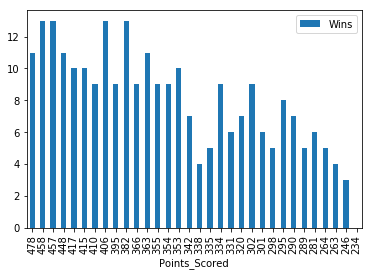

In [22]:
standings.sort_values('Points_Scored', ascending = False).plot.bar(x = 'Points_Scored', y = 'Wins')

The graph shows that teams that score a lot of points alse have high win totals, but there are teams with considerably less points and the same win total. 
Next we can question how the points a team has allowed tie into this. 

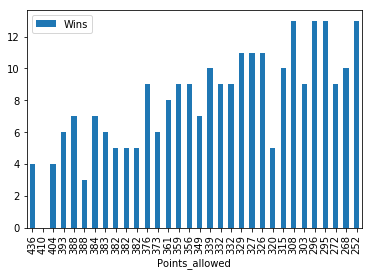

In [23]:
standings.sort_values('Points_allowed', ascending = False).plot.bar(x = 'Points_allowed', y = 'Wins')

The results are comparable to the previous. Teams that have defended better tend to have more wins, with a considerable amount of teams in the middle, having the same results as teams at the bottom.

In order to draw a conclusion we must see how these two stats combined influence the win column.

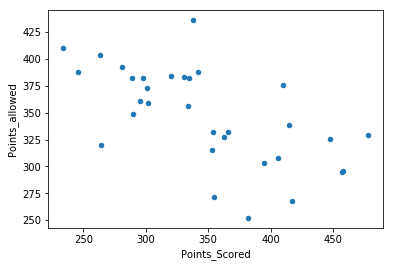

In [24]:
standings.plot.scatter(x = 'Points_Scored', y = 'Points_allowed')

From this graph we see that if a team has scored less than 350 points it is very likely to have allowed over 350.
Also, if a team has allowed less than 350 points it is very likely to have scored over 350.

### The difference between scored and allowed points for each team: 
### (ranked by wins, ascending from left to right)

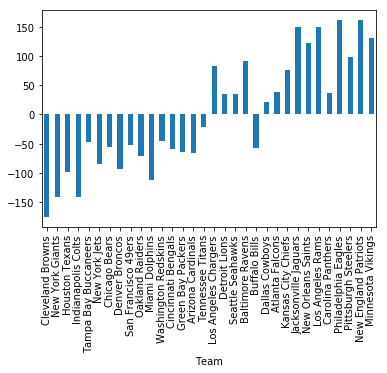

In [25]:
standings['Point_Difference'] = standings['Points_Scored'] - standings['Points_allowed'] 
standings.sort_values('Wins')['Point_Difference'].plot.bar()

The final graph draws a definite conclusion, with there being only one discrepancy. 
What determines whether a team will be in the higher or the lower half of the win column is whether they have scored more points than they have allowed. 
However, the magnitude of the difference between scored and allowed points does not seem to directly influence the total amount of wins. 
Therefore hypothesis 2.1 was incorrect. 

### Hypotheses 2.2 and 2.3

#### Teams ranked by wins versus their amount of wins at home-field:

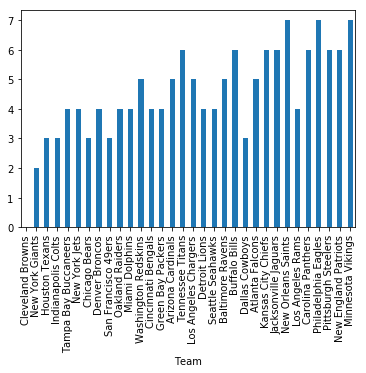

In [26]:
standings.sort_values('Wins')['Home_Wins'].plot.bar()

The highest 'Home_Wins' stat is 7. All throughout the win column there are teams with 4 or 5 home wins, even at the very bottom, which discredits hypothesis 2.2 

#### Teams ranked by wins versus their result from the last 5 games:

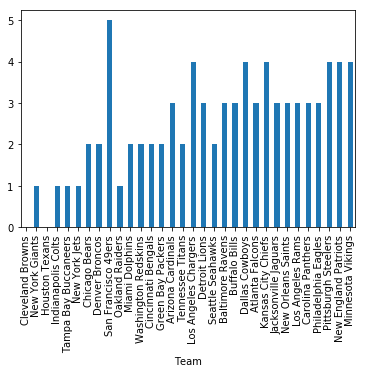

In [27]:
standings.sort_values('Wins')['Final_Streak'].plot.bar()

From this graph we can see that the best 'Final_Streak' stats are achieved by teams at the top half and the middle of the win column, with only one discrepancy towards the end.  
We conclude that hypothesis 2.3 was correct.

### Hypothesis 3.4

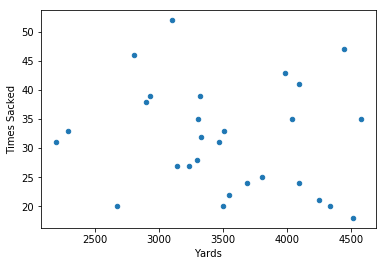

In [28]:
passing_RS[(passing_RS.Yards > 2000 )].plot.scatter(x = 'Yards', y = 'Times Sacked')

The 'Times Sacked' stat shows how many times a QB has been tackled throughout the season (which makes it a team stat if we look at only QBs we have previously concluded are the starters in their teams, and so take up the majority of the playing time). 
The QBs who have been sacked the most are in the left part of the graph, but QBs towards the right end of the graph do not have the lowest amounts of sacks. 
Taking into account that (most of) the best teams have (most of) the best QBs (which was shown in Part 1), we conclude that they do not do the best at protecting their QBs. 

Hypothesis 3.4 was incorrect.

## Part 3
## Hypothesis 3: If players are ranked high based on one stat, are they likely to have a high rank in another stat (in the same table) ?

3.1 The passing table: 

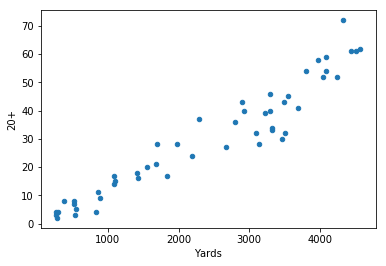

In [29]:
passing_RS.plot.scatter(x = 'Yards', y = '20+')

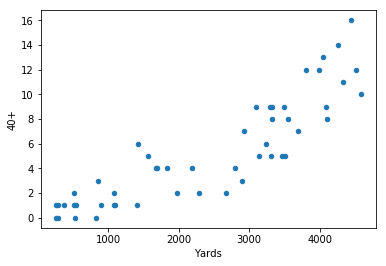

In [30]:
passing_RS.plot.scatter(x = 'Yards', y = '40+')

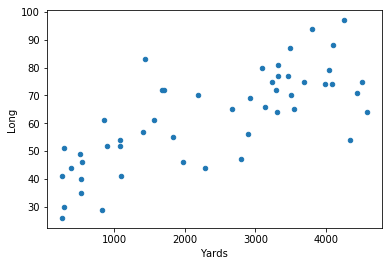

In [31]:
passing_RS.plot.scatter(x = 'Yards', y = 'Long')

The QBs with the most yards do not have the longest completed passes.

We conclude from the graphs that QBs who have a high amount of yards are more likely to have completed more long passes, but their longest completed passes are not among the logest in the table. In part one we also saw that QBs with a high amount of yards also have a high amount of touchdowns. 

3.2 The receiving table:

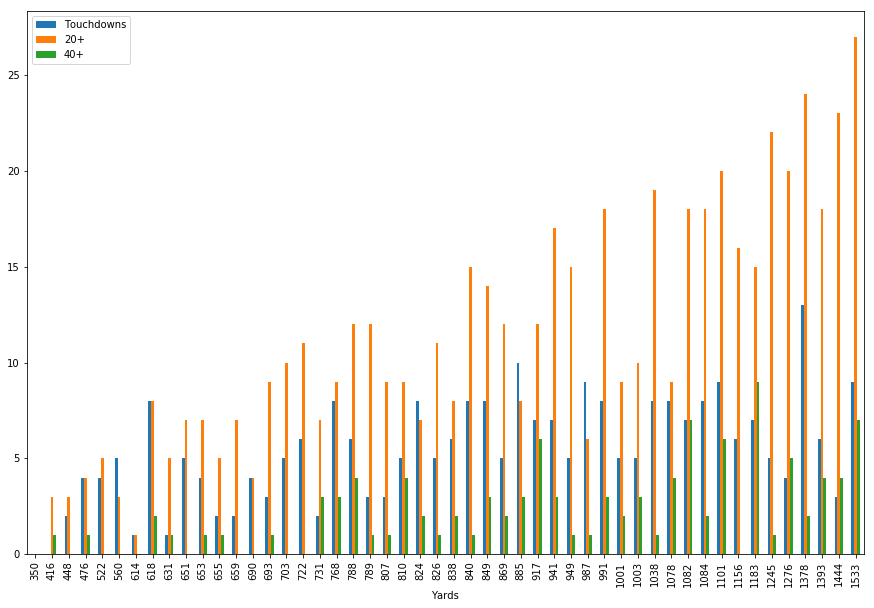

In [32]:
receiving_relevant = receiving_RS[['Yards', 'Touchdowns', '20+', '40+']]
receiving_relevant.sort_values('Yards').plot.bar('Yards', figsize = (15,10))

Here we see that receivers with a high amount of yards are very likely to have caught passes between 20 and 40 yards, but that does not hold true for the amount of touchdowns they have, nor the amount of passes they have caught over 40 yards.

3.3 The rushing table:

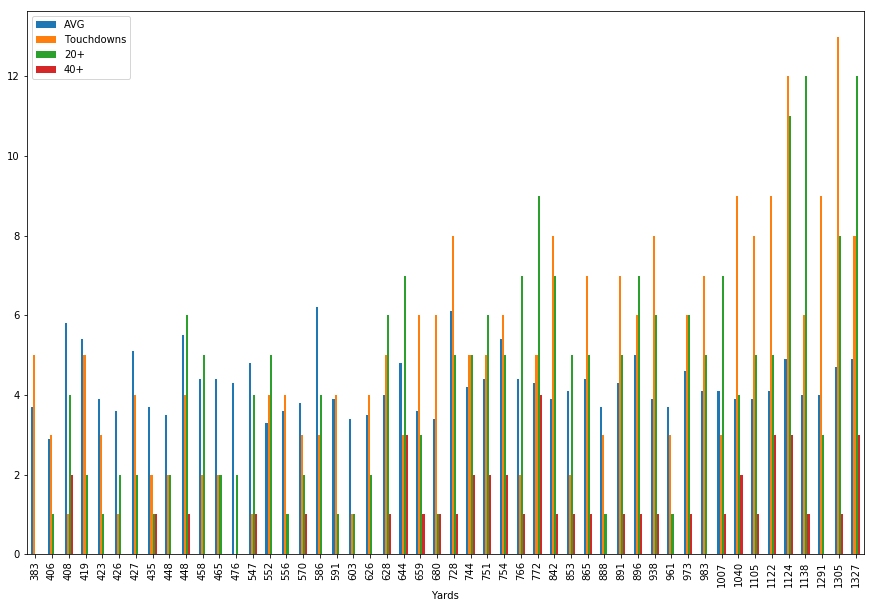

In [33]:
rushing_RS['AVG'] = round(rushing_RS['Yards'] / rushing_RS['Attempts'], 1)
rushing_relevant = rushing_RS[['AVG', 'Touchdowns', '20+', '40+', 'Yards']]
rushing_relevant.sort_values('Yards').plot.bar('Yards', figsize = (15,10))

This graph shows that the more yards a halfback has, the more likely he is to have a high amount of touchdowns. However the average yards per attempt, and the amount of long runs that a halfback has completed do not rise in accordance with the amount of yards.  

Fumbles are a negative stat, showing how many times a halfback has dropped the ball. 

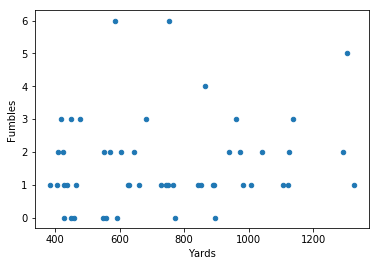

In [34]:
rushing_RS.plot.scatter(x = 'Yards', y = 'Fumbles')

Most of the top 50 halfbacks have lost the ball less than 3 times, so there is no clear division between lower and higher ranked halfbacks. 

##### All three subparts of Part 3 show that if a player has a high rank in one stat, there is at least one other stat in which he has a high rank.
##### Hypothesis 3 is correct